In [18]:
import numpy
import torch
import typing

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")

using device: cuda:0


In [20]:
import handleDatas
import train
import moe_model
import basicModels

def cell():
    global handleDatas, train, moe_model, basicModels
    import importlib
    handleDatas = importlib.reload(handleDatas)
    train = importlib.reload(train)
    moe_model = importlib.reload(moe_model)
    basicModels = importlib.reload(basicModels)

cell();

In [32]:
datashandler = handleDatas.Cifar10_Datas(
    fromTrainSource=None, maxSamples=None, trainProp=0.8, classesOffset=0,
    batchSizeTrain=256, batchSizeTest=256)

loaded Cifar10(total: 60000), train: 48000 [188 batches] | test: 12000 [47 batches]


In [33]:
model, optim, loss = basicModels.BasicImageClassifModel.get_Cifar10(device=device, modelConfig="medium")
hist = train.HistoryClassification()
basicModels.countLayersparameters(model)

# test the model
_ = model(datashandler.full_dataset[0]['image'].to(device))

+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| CNN_block1.0.weight  |    432     |
| CNN_block2.0.weight  |   4_608    |
| CNN_block2.1.weight  |     32     |
|  CNN_block2.1.bias   |     32     |
| CNN_block3.0.weight  |   9_216    |
| CNN_block4.0.weight  |   18_432   |
| CNN_block5.0.weight  |   73_728   |
| CNN_block6.0.weight  |  294_912   |
| CNN_block6.1.weight  |    256     |
|  CNN_block6.1.bias   |    256     |
| outputBlock.2.weight |   40_960   |
|  outputBlock.2.bias  |     10     |
+----------------------+------------+
Total Trainable Params: 442_874


In [34]:
train.train_model_classif(
    model=model, optimizer=optim, criterion=loss, device=device,
    datasHandler=datashandler, nbEpoches=10, history=hist);

Epoch 1, train: (loss: 1.553, accuracy: 44.58%), test: (loss: 1.254, accuracy: 55.56%), lr: 1.0000e-03
Epoch 2, train: (loss: 1.015, accuracy: 64.08%), test: (loss: 1.082, accuracy: 63.29%), lr: 1.0000e-03
Epoch 3, train: (loss: 0.8422, accuracy: 70.83%), test: (loss: 0.9802, accuracy: 65.71%), lr: 1.0000e-03
Epoch 4, train: (loss: 0.7022, accuracy: 75.51%), test: (loss: 0.882, accuracy: 70.70%), lr: 1.0000e-03
Epoch 5, train: (loss: 0.6229, accuracy: 78.21%), test: (loss: 0.7353, accuracy: 74.99%), lr: 1.0000e-03
Epoch 6, train: (loss: 0.5365, accuracy: 81.36%), test: (loss: 0.7396, accuracy: 75.15%), lr: 1.0000e-03
Epoch 7, train: (loss: 0.4732, accuracy: 83.56%), test: (loss: 0.6224, accuracy: 79.61%), lr: 1.0000e-03
Epoch 8, train: (loss: 0.4141, accuracy: 85.56%), test: (loss: 0.7404, accuracy: 75.59%), lr: 1.0000e-03
Epoch 9, train: (loss: 0.3579, accuracy: 87.51%), test: (loss: 0.6474, accuracy: 79.19%), lr: 1.0000e-03
Epoch 10, train: (loss: 0.3028, accuracy: 89.46%), test: (lo

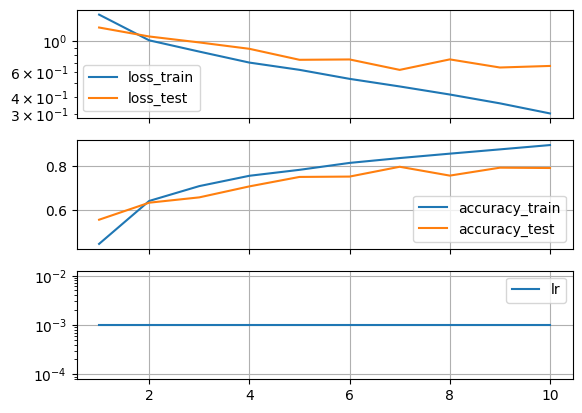

In [35]:
hist.plot();